# Chaines de Markov et épidémiologie :
## _Propagation d’une épidémie dans une population_



L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une épi-
démie dans une population.

## Partie 1 : Apprentissage des paramètres d’un modèle à partir de données

In [ ]:
#import neccessary packages
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


Dans notre modèle, nous allons considérer qu’à chaque temps :
*   Chaque individu sain peut rester sain ou devenir infecté
*   Chaque individu infecté peut rester infecté ou devenir guéri
*   Chaque individu guéri reste guéri

et que la probabilité de passer d’un état à l’autre ne dépend que de l’état précédent.

Nous disposons d’une séquence d’observations et nous souhaitons apprendre les paramètres de la
chaîne de Markov permettant de modéliser le processus sous-jacent qui a généré la séquence. Nous avons
suivi un individu pendant 10 jours, afin de déterminer a chaque temps dans quel état se trouvait l’individu.
Nous avons obtenu la séquence d’observation suivante : S, S, S, I, I ,I ,I , I, I, R.

In [ ]:
#On définit in dictionnaire pour les états de la chaines de Markov
etats = {'S':0, 'I':1, 'R':2}

**1- L'estimation des probabilités de transision entre les états**



*   Un individu sain peut soit rester sain 
avec un probabilité de 
$\frac{2}{3}$ ou devenir infecté avec une probabilité de $\frac{1}{3}$
*   Un individu infecté peut rester infecté avec un probabilité de 
$\frac{5}{6}$ ou devenir guéri avec un probabilité de 
$\frac{1}{6}$
*   Un individu guéri reste guéri avec un probabilité de 
1






**La matrice de probabilité de transitions est**

In [ ]:
# Création de la matrice de transition
P = np.array([[2/3, 1/3, 0],[0, 5/6, 1/6],[0, 0, 1]])
print(P)

[[0.66666667 0.33333333 0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.         1.        ]]


 Nous avons ensuite suivit une population de 5000 individus, pendant 200 jours.

1. Lire des données

In [ ]:
#lecture des données 
data_set = np.loadtxt('data_exo_2022.txt')

2- Estimation des probabilités de transition entre les états et dressage de la matrice de probabilité de transitions

In [ ]:
matrice_transition = np.zeros((3,3))

def create_matrice_transit(data_set,matrice_transition) :
  nb_S = np.count_nonzero(data_set == etats['S'])
  nb_I = np.count_nonzero(data_set == etats['I'])
  nb_R = np.count_nonzero(data_set == etats['R'])
  for T in range(len(matrice_transition[0])):
    for T_1 in range(len(matrice_transition)) : 
      for i in range(data_set.shape[0]):
        for j in range(data_set.shape[1]-1):
          if data_set[i][j]==T_1 and data_set[i][j+1]==T :
            matrice_transition [T_1][T] +=1
      if T_1==0 :
        matrice_transition [T_1][T] =matrice_transition [T_1][T] /nb_S
      if T_1==1 :
        matrice_transition [T_1][T] =matrice_transition [T_1][T]/nb_I
      if T_1==2 :
        matrice_transition [T_1][T] =matrice_transition [T_1][T]/nb_R
  return matrice_transition

print (create_matrice_transit(data_set,matrice_transition))

[[0.92665658 0.06886075 0.        ]
 [0.         0.9308678  0.06451953]
 [0.04042983 0.         0.95392264]]


### Partie 2 : Description du premier modèle

La probabilité pour un individu d’être dans un de ces 3 états au temps t, ne dépend que l’état dans
lequel il est au temps t − 1.

Un individu dans l’état sain a une probabilité de 0.92 de rester sain et une probabilité de 0.08 de
devenir infecté. Si l’individu est infecté, il peut le rester avec une probabilité de 0.93 et être guéri avec
une probabilité de 0.07. S’il est dans l’état guéri, il reste dans cet état avec une probabilité de 1.


1. Création de la matrice de transition A

In [ ]:
# Création de la matrice de transition
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.0, 0.0, 1.0]])

**Création d'une fonction permettant de vérifier qu’une matrice est
stochastique.**
On doit vérifier dans la matrice que toute les probas sont entre 0 et 1 et la somme de chaque ligne vaut 1.

In [ ]:
def matrice_stochastique(M):
  for i in range(len(M)):
    somme_ligne = 0
    for j in range(len(M)):
      if(M[i][j]<0 or M[i][j]>1 ):
        return False
      somme_ligne += M[i][j]
    if somme_ligne != 1 :
      return False
  return True

Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

**2. Créez π0 la distribution de probabilité initiale.**

In [ ]:
# Création de  π0 la distribution de probabilité initiale.
π0 = np.array([0.9, 0.1, 0])

##Distribution πt



1. la probabilité pour un individu d’être sain, infecté ou guéri au temps
t = 1






In [ ]:
π1 = np.dot(π0, A)
print(π1)

[0.828 0.165 0.007]



2. la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 2 



In [ ]:
π2 = np.dot(π1, A)
print(π2)

[0.76176 0.21969 0.01855]




3. pour chaque temps t entre 1 et 200, calcul de la distribution théorique des effectifs dans chaque état (Rappel πt+1 = πtA )  



In [ ]:
πt = np.zeros((200, 3))
πt[0] = π0
for i in range(1, 200) :
  πt[i] = np.dot(πt[i-1], A)
print(πt)

[[9.00000000e-01 1.00000000e-01 0.00000000e+00]
 [8.28000000e-01 1.65000000e-01 7.00000000e-03]
 [7.61760000e-01 2.19690000e-01 1.85500000e-02]
 [7.00819200e-01 2.65252500e-01 3.39283000e-02]
 [6.44753664e-01 3.02750361e-01 5.24959750e-02]
 [5.93173371e-01 3.33138129e-01 7.36885003e-02]
 [5.45719501e-01 3.57272330e-01 9.70081693e-02]
 [5.02061941e-01 3.75920827e-01 1.22017232e-01]
 [4.61896986e-01 3.89771324e-01 1.48331690e-01]
 [4.24945227e-01 3.99439090e-01 1.75615683e-01]
 [3.90949609e-01 4.05473972e-01 2.03576419e-01]
 [3.59673640e-01 4.08366763e-01 2.31959597e-01]
 [3.30899749e-01 4.08554980e-01 2.60545271e-01]
 [3.04427769e-01 4.06428112e-01 2.89144119e-01]
 [2.80073547e-01 4.02332365e-01 3.17594087e-01]
 [2.57667664e-01 3.96574984e-01 3.45757353e-01]
 [2.37054251e-01 3.89428148e-01 3.73517602e-01]
 [2.18089911e-01 3.81132518e-01 4.00777572e-01]
 [2.00642718e-01 3.71900434e-01 4.27456848e-01]
 [1.84591300e-01 3.61918821e-01 4.53489879e-01]
 [1.69823996e-01 3.51351808e-01 4.788241



4. Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps.



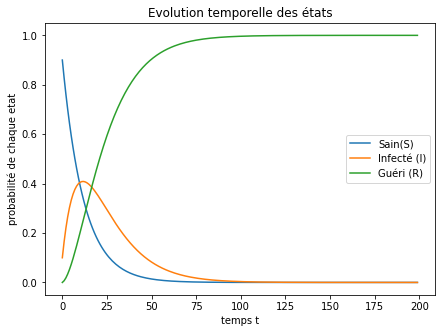

In [ ]:
T= np.arange(200)
fig = plt.figure(figsize=(7,5))
plt.title("Evolution temporelle des états")
plt.plot(T, πt[:,0] ,label = 'Sain(S)')
plt.plot(T, πt[:,1] ,label = 'Infecté (I)')
plt.plot(T, πt[:,2] ,label = 'Guéri (R)')
plt.xlabel("temps t")
plt.ylabel("probabilité de chaque etat")
plt.legend()
plt.show()


Nous observons qu'au tout début de la pendémie tous les individus sont sains , ce nombre decroit tres rapidement et devient presque nul au bout de 60 jours
le nombre d'individus infectés était trés bas au debut de la pandemie , il accroit jusqu'à atteindre son seuil avec  40% de la population(c'est le pic de la pandemie) , ensuite il decroit assez lentement il devient nul au bout du 80 éme jour
au meme temps le nombre d'individus guéris accroit avec la baisse des individus infectés 
au bout du 80 eme jour tous les individus infectés deviennent guéris on peut dire que la pandemie commence à prendre fin au bout du 80 éme jour 

## Tirage sequence aleatoire

generation d'une sequence de taille N aléatoirement 

In [ ]:
def  sequence_aleatoire(A, pi0, t, n):
  """
    @param A : la matrice de transition
    @param pi0 : la distribution de probabilité initiale
    @param t : nombre de jour
    @param n : nombre d'individu
    @return sequences_res : la séquence générée
  """
  sequences_res = np.zeros((n, t)) 
  for j in range(n):
        #on génére l'état initial de chaque individu on fonction de la distribution de probabilité initiale pi0
        sequences_res[j, 0] = np.random.choice([0., 1., 2.], p=pi0)
        for i in range(1, t):
            #on génére les états suivant en fonction de la matrice de transition
            sequences_res[j, i] = np.random.choice([0., 1., 2.], p=A[int(sequences_res[j, i-1])])
  return sequences_res
print(sequence_aleatoire(A, π0, 150, 1))

[[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2.]]


## Modélisation d'une population

1. A chaque temps t, calcul du nombre d’individus sains, infectés et guéris dans la population & affichage de l’évolution du nombre d’individus dans les trois états en fonction du temps.

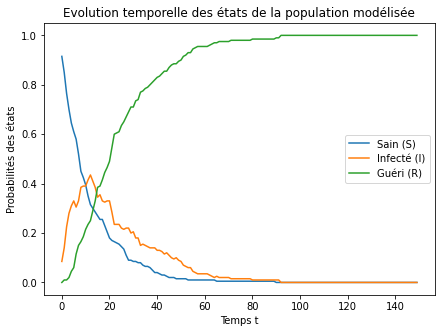

In [ ]:

def observation(M, pi_0, t, n):
    """
      @param A : la matrice de transition
      @param pi0 : la distribution de probabilité initiale
      @param t : nombre de jour
      @param n : nombre d'individu
    """
    T = np.arange(t) 
    sequences = sequence_aleatoire(M, pi_0, t, n)

    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(sequences == 0., axis=0)
    πt[:,1] = np.sum(sequences == 1., axis=0)
    πt[:,2] = np.sum(sequences == 2., axis=0)
    πt /=n    #pk on a divisé par n normalement c'est le nombre d'états
    fig = plt.figure(figsize=(7, 5))
    plt.title("Evolution temporelle des états de la population modélisée")
    plt.plot(T, πt[:,0], label='Sain (S)')
    plt.plot(T, πt[:,1], label="Infecté (I)")
    plt.plot(T, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps t")
    plt.ylabel("Probabilités des états")
    plt.legend()
    plt.show()

observation(A,π0, 150, 200 )

#il maque la question 3




2.   pourcentage d’indivudus sains infectés et guéris en fonction du temps



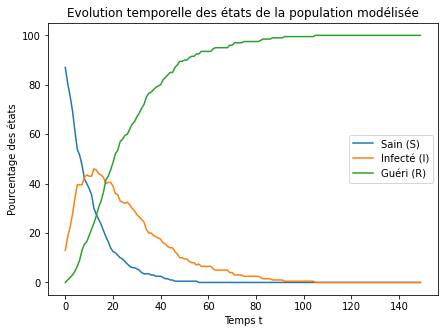

In [ ]:
def observation_pourcent(M, pi_0, t, n):
    T = np.arange(t)
    
    sequences = sequence_aleatoire(M, pi_0, t, n)

    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(sequences == 0., axis=0)*100
    πt[:,1] = np.sum(sequences == 1., axis=0)*100
    πt[:,2] = np.sum(sequences == 2., axis=0)*100
    πt /=n    
    fig = plt.figure(figsize=(7, 5))
    plt.title("Evolution temporelle des états de la population modélisée")
    plt.plot(T, πt[:,0], label='Sain (S)')
    plt.plot(T, πt[:,1], label="Infecté (I)")
    plt.plot(T, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps t")
    plt.ylabel("Pourcentage des états")
    plt.legend()
    plt.show()

observation_pourcent(A,π0, 150, 200 )

Population de  5 individus et 5000
individus

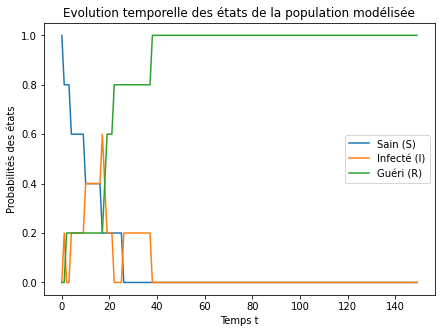

In [ ]:
observation(A,π0, 150, 5 )


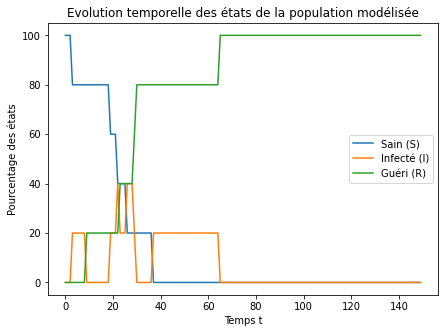

In [ ]:
observation_pourcent(A, π0, 150, 5)


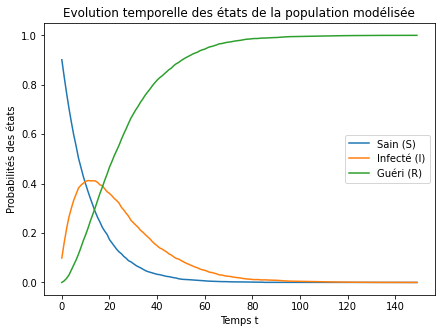

In [ ]:
observation(A, π0, 150, 5000)


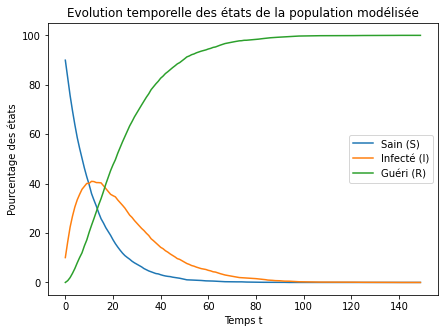

In [ ]:
observation_pourcent(A, π0, 150, 5000)


##Longueur de l’infection



1.  la longueur moyenne d’une séquence de I. 



Pour 200 individus et une durée de 150 jours on a : 

In [ ]:
alea_seq = sequence_aleatoire(A,  π0, 150, 200)
longueur = np.count_nonzero(alea_seq == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(longueur), "jours")

La longueur moyenne d'infection est de 14.2 jours




2.   Afficher la distribution observée de la longueur d’infection



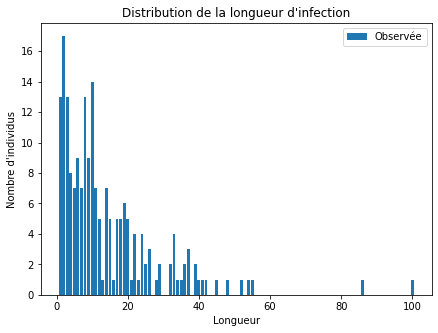

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(uo, co, label="Observée")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()



3.   la longueur théorique d’une séquence de I



Les longueurs d'infections calculées précédemment sont celles que nous avons observées.

Soit p, la probabilité de passer de l'état I à l'état R. Les longueurs théoriques suivent des lois géométriques  de paramètre p.

Calculons p et calculons la longueur théorique.

In [ ]:
p = A[1, 2]
q = 1 - p
print("La probabilité de passer de l'état I à l'état R est de", p)
print("La longueur d'infection théorique est de", 1/p, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


calcul de la distribution théorique de la longueur d'infection

In [ ]:
longueur_th = np.zeros_like(longueur, dtype=float)
for i in range(0, len(longueur)):
   longueur_th[i] = (q**i)*p*200

5.Affichage la distribution théorique de la longueur d’infection

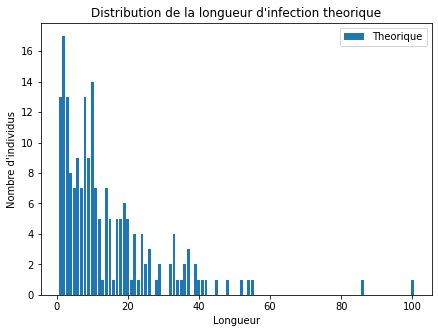

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(uo, co, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

4.Comparaison la longueur estimée et la longueur théorique(comparaison graphique)


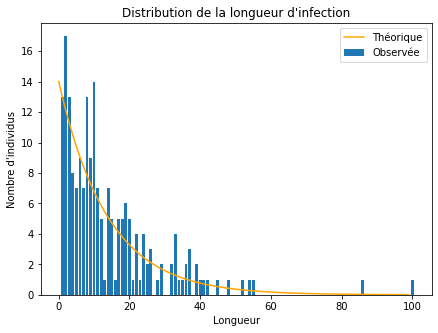

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.title("Distribution de la longueur d'infection")
plt.bar(uo, co, label="Observée")
plt.plot(np.arange(100), longueur_th[:100], label="Théorique", color="orange")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

## Petites modifications autour de ce premier 

1. la taille de la population

testons la longueur d'infections pour 5000 individus sur une durée de 200 jours 

In [ ]:
alea_seq = sequence_aleatoire(A,  π0, 200, 5000)
longueur = np.count_nonzero(alea_seq == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(longueur), "jours")

La longueur moyenne d'infection est de 42.3372 jours


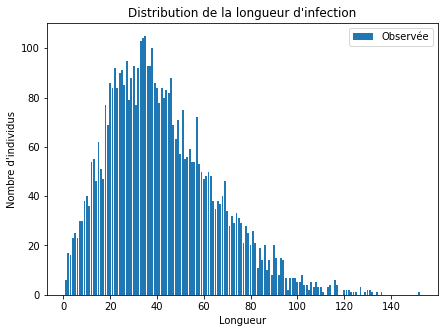

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(uo, co, label="Observée")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [ ]:
p = A[1, 2]
q = 1 - p
print("La probabilité de passer de l'état I à l'état R est de", p)
print("La longueur d'infection théorique est de", 1/p, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [ ]:
longueur_th = np.zeros_like(longueur, dtype=float)
for i in range(0, len(longueur)):
   longueur_th[i] = (q**i)*p*200

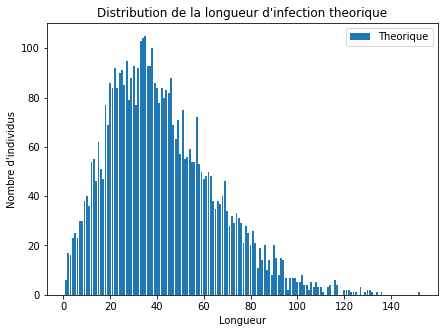

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(uo, co, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

2. la distribution de probabilité initiale

In [ ]:
pi = np.array([0.7, 0.2, 0.1])
alea_seq = sequence_aleatoire(A,  pi, 150, 180)
longueur = np.count_nonzero(alea_seq == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(longueur), "jours")

La longueur moyenne d'infection est de 33.31666666666667 jours


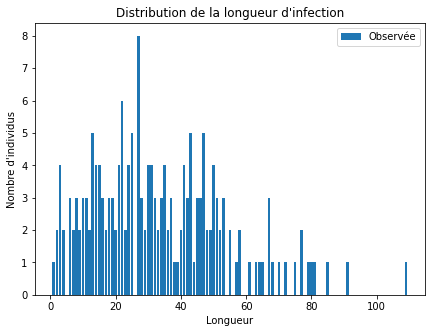

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(uo, co, label="Observée")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [ ]:
p = A[1, 2]
q = 1 - p
print("La probabilité de passer de l'état I à l'état R est de", p)
print("La longueur d'infection théorique est de", 1/p, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [ ]:
longueur_th = np.zeros_like(longueur, dtype=float)
for i in range(0, len(longueur)):
   longueur_th[i] = (q**i)*p*200

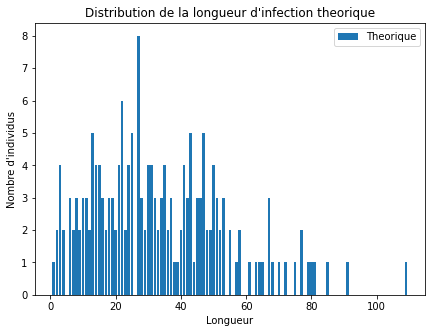

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(uo, co, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

3. les probabilités de transition.

In [ ]:
M = A.copy()
M[0,0] = 0.8
M[0,1] = 0.2
alea_seq = sequence_aleatoire(M, π0 , 150, 180)
longueur = np.count_nonzero(alea_seq == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(longueur), "jours")

La longueur moyenne d'infection est de 39.26111111111111 jours


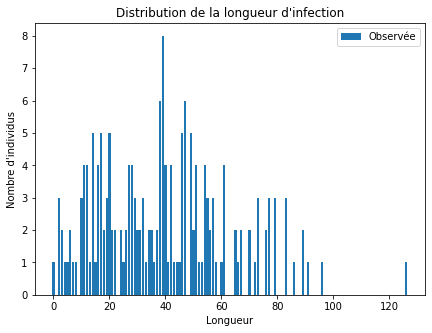

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(uo, co, label="Observée")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [ ]:
p = M[1, 2]
q = 1 - p
print("La probabilité de passer de l'état I à l'état R est de", p)
print("La longueur d'infection théorique est de", 1/p, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [ ]:
longueur_th = np.zeros_like(longueur, dtype=float)
for i in range(0, len(longueur)):
   longueur_th[i] = (q**i)*p*200

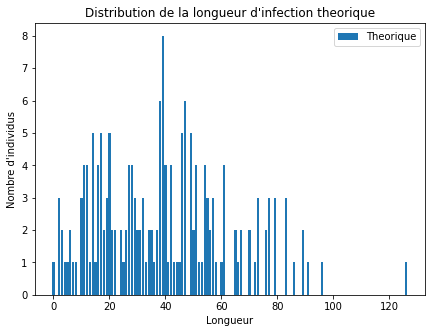

In [ ]:
fig = plt.figure(figsize=(7, 5))
uo, co = np.unique(longueur, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(uo, co, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

## Partie 3 : Description du second modèle

## Analyse du modèle



1.   Ce processus à état discret et à temps discret (processus stochastique) , la proprieté de markov d'ordre 1 est respectée puisque chaque état à t+1 ne dépend que de son état d'origine à t 






2.   la nouvelle matrice de transition



In [ ]:
A = A.copy()
A[2,0] = 0.02
A[2,2] = 0.98
print(A)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


In [ ]:
print(A, "est-elle stochastique ?", ("oui" if matrice_stochastique(A) else "non"))

0.92   0.92
0.08   1.0
0.0   1.0
0.0   0.0
0.93   0.93
0.07   1.0
0.02   0.02
0.0   0.02
0.98   1.0
[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]] est-elle stochastique ? oui




3.  cette chaine de markov est apériodique (car il existe des états qui bouclent sur eux meme) , elle est irréductible car touts les étas sont communiquants , elle est reccurente positive => cette CM est ergodique






4.   Calculez la matrice A × A. A quoi correspond-elle ? Est elle stochastique ? Même question pour A3 et A4




In [ ]:
A2 = np.linalg.matrix_power(A, 2)
print(A2, "est-elle stochastique ?", ("oui" if matrice_stochastique(A2) else "non"))

[[0.8464 0.148  0.0056]
 [0.0014 0.8649 0.1337]
 [0.038  0.0016 0.9604]] est-elle stochastique ? non


In [ ]:
A3 = np.linalg.matrix_power(A, 3)
print(A3, "est-elle stochastique ?", ("oui" if matrice_stochastique(A2) else "non"))

[[0.7788   0.205352 0.015848]
 [0.003962 0.804469 0.191569]
 [0.054168 0.004528 0.941304]] est-elle stochastique ? non


In [ ]:

A4 = np.linalg.matrix_power(A, 4)
print(A4, "est-elle stochastique ?", ("oui" if matrice_stochastique(A4) else "non"))


[[0.71681296 0.25328136 0.02990568]
 [0.00747642 0.74847313 0.24405045]
 [0.06866064 0.00854448 0.92279488]] est-elle stochastique ? non
0.24405045000000003




5.   nouvelles simulations



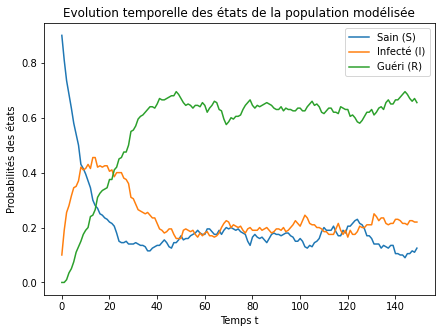

In [ ]:
observation(A,π0, 150, 200 )


Avant l'épidémie, tous les individus sont sains. La probabilité d'être sain est maximale, avoisine 1. au cours de l'épidémie, la probabilité d'être sain baisse très vite. Cependant, elle ne devient pas nulle. En d'autres termes, un individu peut d'une certaine façon connaitre tous les états et revenir à l'état sain. Aux instants proches de t = 60, la probabilité pour un individu d'être sain semble ne plus changer. Elle prend une valeur  proche de 0.2.

La probabilité pour un individu d'être infecté, au début de la pandémie avoisine 0. Elle croît en même temps que baisse la probabilité d'être sain. Aux instants proches de t = 15, elle atteint son seuil : sa probabilité maximale, qui, approxime 0.4. Ensuite, elle baisse légèrement jusqu'à 0.2. Au même instant que la probabilité d'être sain se fixe, la probabilité d'être infecté se fixe aussi. Elle prend une valeur finale inférieure et proche de 0.2, et supérieure à la probabilité d'être sain.

La proportion d'individus guéris est au départ de 0. Elle croit alors que baissent les probabilités d'être sain et d'être infecté. Elle ne change quasiment plus en même temps que les deux autres probabilités, aux instants proches de t = 60 et prend une valeur finale approximant de 0.62.

Aux instants t > 60, le vecteur des probabilités  converge et les probabilités des états ne changent quasiment plus. Comme dans ce vecteur, aucune probabilité d'un état donné n'est nulle, chaque individu peut donc se trouver et transiter dans tous les autres états possibles, en fonction des probabilités de transition.



6.  Refaites les simulations avec une autre distribution de probabilité initiale



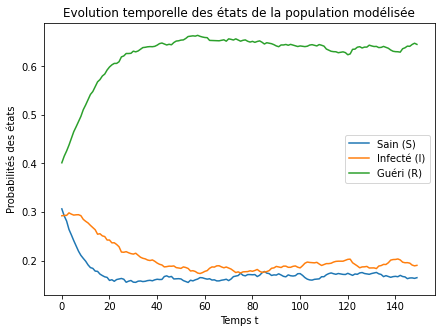

In [ ]:
pi = [0.3, 0.3, 0.4]
observation(A,pi, 150, 5000 )

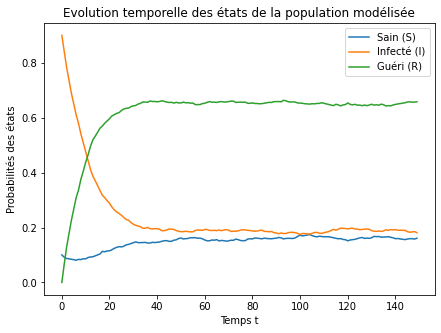

In [ ]:
pi = [0.1, 0.9, 0.]
observation(A,pi, 150, 5000 )

Nous remarquons que, peu importe la distribution de probabilités initiale, à un instant donné, les probabilités des états deviennent stationnaires.



7.   la distribution de probabilité stationnaire



In [ ]:
dist = np.zeros_like(A)
An = A.copy()

while not np.all(An == dist):
    dist = An.copy()
    An = np.dot(An, A)

print("La distribution de probabilités stationnaire est", An[0])

La distribution de probabilités stationnaire est [0.1627907  0.18604651 0.65116279]


representation graphique de la distribution stationnaire

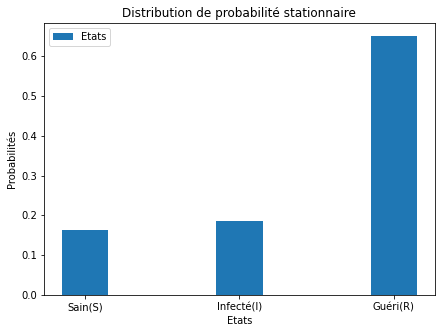

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.title("Distribution de probabilité stationnaire")
plt.bar(np.array(["Sain(S)", "Infecté(I)", "Guéri(R)"]), An[0], label="Etats", width=0.3)
plt.xlabel("Etats")
plt.ylabel("Probabilités")
plt.legend()
plt.show()

simulations pour t assez grand

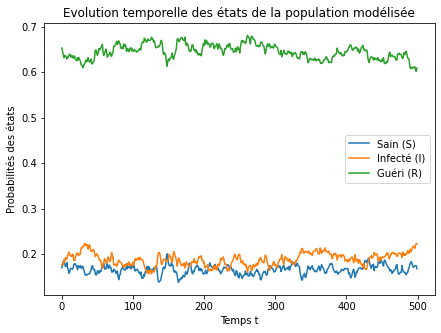

In [ ]:
observation(A,An[0], 500, 1000 )

la distribution de probabilité stationnaire* est toujours atteinte à un temps t donné, en fonction de la distribution de probabilité initiale. On le remarque bel et bien sur toutes les simulations faites précédemment sur ce modèle donc il ya convergence 

## Longueur de l’immunité



1. La longueur moyenne d’une séquence de R

Dans ce modéle les séquance de R peuvent ne pas étre toujours consécutivent car une personne déja guérie peut redevenir saine. Par conséquent, on ne peut pas procéder comme la question précedente qui consite à calculer la longueur moyenne d'une séquence de I en claculant juste le nombre d'états I d'une séquence donnée.

In [ ]:

alea_seq = sequence_aleatoire(A,  π0, 150, 200)
longueurs = np.zeros(alea_seq.shape[0])
for i in range(alea_seq.shape[0]):
    longueur = []
    l = 0
    pos = np.where(alea_seq[i] == 2)[0]
    n = len(pos)
    for j in range(1, n):
        l += 1
        if (pos[j]-pos[j-1] != 1):
            longueur.append(l)
            l = 0
        if j == n-1:
            l = max(1, l+1)
            longueur.append(l)
    longueurs[i] = 0 if longueur == [] else int(np.mean(longueur))

print("La longueur moyenne d'infection est de", np.mean(longueurs), "jours")

La longueur moyenne d'infection est de 46.49 jours


2. La longueur théorique d’une séquence de R


Soit p, la probabilité de passer de l'état R à l'état S. Les longueurs théoriques suivent des lois géométriques de paramètre p.

Calculons p et calculons la longueur théorique.

In [ ]:
p = A[2, 0]
q = 1 - p
print("La probabilité de passer de l'état R à l'état S est de", p)
print("La longueur théorique est de", 1/p, "jours")

La probabilité de passer de l'état R à l'état S est de 0.02
La longueur théorique est de 50.0 jours


3. Affichage la distribution théorique et la distribution observée de la longueur de l’immunité.

calcul de la distribution théorique de la longueur d'immunité

In [ ]:
long_theoriques = np.zeros_like(longueurs, dtype=float)
for i in range(len(longueurs)):
    long_theoriques[i] = (q**i)*p*200

Représentation de la distribution théorique

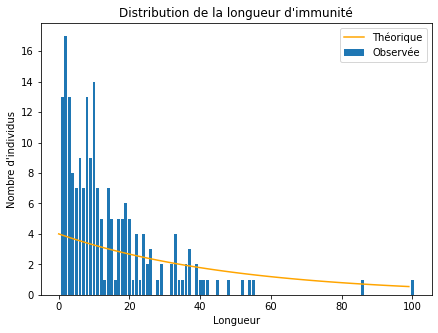

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.title("Distribution de la longueur d'immunité")
plt.bar(uo, co, label="Observée")
plt.plot(long_theoriques[:100], label="Théorique", color="orange")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

## Modifier le modèle


1. L'évolution de l’épidémie si on modifie la probabilité pour un individu sain de devenir infecté.



[[0.9  0.1  0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


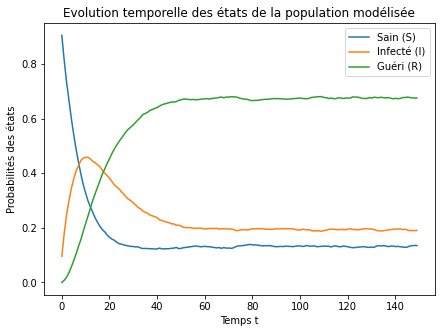

In [ ]:
A2 = A.copy()
A2[0,0] = 0.9
A2[0,1] = 0.1
π0 = np.array([0.9, 0.1, 0])
print(A2)
observation(A2,π0, 150,10000 )

[[0.6  0.4  0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


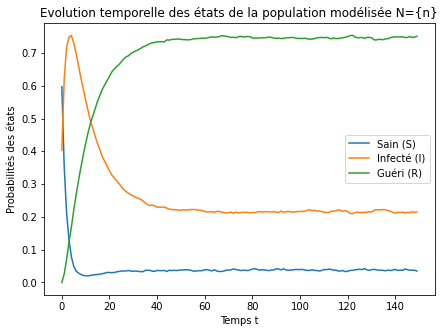

In [ ]:
A2 = A.copy()
A2[0,0] = 0.6
A2[0,1] = 0.4
print(A2)
observation(A2,π0, 150,10000 )

On remarque que si on augmente la probabilité pour un individu sain de devenir infecté, le nombre d'individus inféctés augmente rapidement afin d'atteindre le pic contrairement au nombre d'individus sains qui diminue rapidement, contre un nombre de guéris qui augmente vite.
Et on remarque aussi que le pic atteint par les individus inféctés a augmenté.



2. L'évolution de l’épidémie si on modifie la probabilité pour un individu guéri de devenir sain.

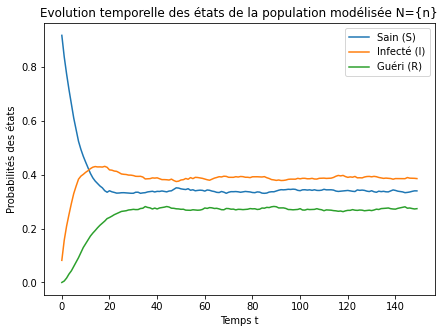

In [ ]:
A3 = A.copy()
A3[2,0] = 0.1
A3[2,2] = 0.9
observation(A3,π0, 150,10000 )

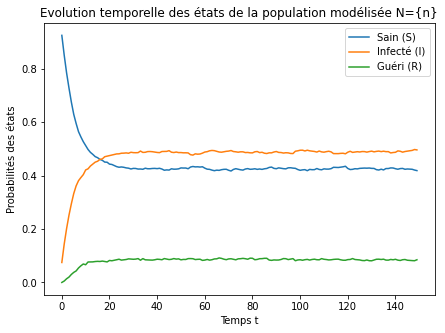

In [ ]:
A3 = A.copy()
A3[2,0] = 0.4
A3[2,2] = 0.6
observation(A3,π0, 150,10000 )

## Partie 4 : confinement

On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de
devenir infecté devient nulle.

1. Nous allons alterner entre les périodes de non distanciation et de distanciation.

On note A la matrice de transition pendant la période de non distanciation, et B la matrice de transition pendant la période de distanciation

In [ ]:
print("A = ",A)
B = A.copy()
B[0, 0] = 1.
B[0, 1] = 0.
print("B = ",B)

A =  [[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]
B =  [[1.   0.   0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


Nous allons commencer la simulation avec la matrice de transition A et en considérant que tous les individus sont sains. Quand il y a 25% d’individus infectés dans la population, nous passons en période de distanciation et dés qu'il y aura moins  de 10% d’infectés, le confinement sera levé.



In [ ]:
π0 = [1, 0, 0]

In [ ]:
def observation_confinement(A, B, pi_0, t, n, confinement=False, c_seuil=0.1 ,nc_seuil=0.25):
    T = np.arange(t)
    confinements = []
    deconfinements = [] 
    alea_seq = np.zeros((n, t))
    alea_seq[:, 0] = np.argmax(pi_0)
    for i in range(1, t):
        M = B if confinement else A
        for j in range(n):
            alea_seq[j, i] = np.random.choice([0., 1., 2.], p=M[int(alea_seq[j, i-1])])
        
        # pourcentage de I
        pI = np.count_nonzero(alea_seq[:, i] == 1.) / n
        
        if confinement:
            if pI <= c_seuil:
                # pourcentage des infectés est inférieur à c_seuil -> déconfinement
                confinement = False
                deconfinements.append(i)
        else:
            if pI >= nc_seuil:
                # pourcentage des infectés est supérieur à nc_seuil -> confinement
                confinement = True
                confinements.append(i)
                
    print("Nombre de confinements:", len(confinements))
    print("Instants de confinement:", confinements)
    print("Nombre de déconfinements:", len(deconfinements))
    print("Instants de déconfinement:", deconfinements)
            
    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(alea_seq == 0., axis=0)
    πt[:,1] = np.sum(alea_seq == 1., axis=0)
    πt[:,2] = np.sum(alea_seq == 2., axis=0)
    πt /= n
        
    fig = plt.figure(figsize=(7, 5))
    plt.title("Evolution temporelle des états de la population modélisée N={n}")
    plt.plot(T, πt[:,0], label='Sain (S)')
    plt.plot(T, πt[:,1], label="Infecté (I)")
    plt.plot(T, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps t")
    plt.ylabel("Probabilités des états")
    plt.legend()
    plt.show()

Effectuons des simulations sur une population de 200 individus observés pendant 150 jours.

Nombre de confinements: 5
Instants de confinement: [4, 21, 40, 58, 78]
Nombre de déconfinements: 5
Instants de déconfinement: [17, 36, 53, 71, 90]


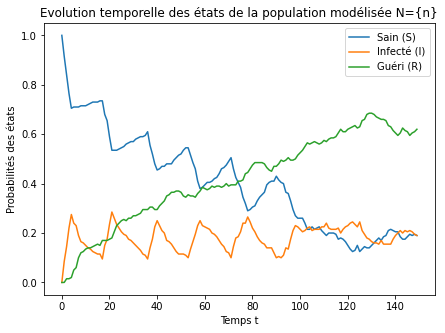

In [ ]:
observation_confinement(A, B, π0, 150, 200)

sur une population de 2000 individus

Nombre de confinements: 5
Instants de confinement: [4, 22, 43, 65, 88]
Nombre de déconfinements: 5
Instants de déconfinement: [18, 37, 56, 79, 101]


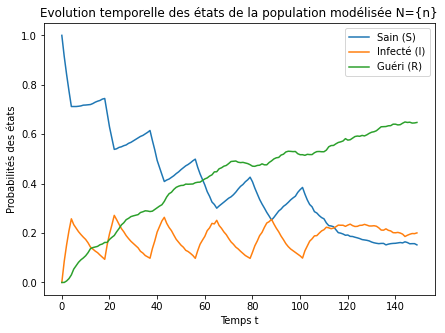

In [ ]:
observation_confinement(A, B, π0, 150, 2000)

sur une population de 2000 individus pendant 1000 jours

Nombre de confinements: 5
Instants de confinement: [4, 20, 38, 57, 88]
Nombre de déconfinements: 5
Instants de déconfinement: [17, 33, 50, 71, 100]


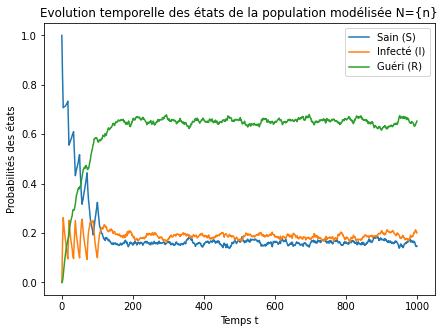

In [ ]:
observation_confinement(A, B, π0, 1000, 2000)

D'aprés ces résultats on peut conclure qu'il faut 5 confinements et 5 déconfinements

### Partie5

Quelles remarques critiques pouvez faire sur les modèles utilisés ? et quelles améliorations suggériez-vous 

Ce modèle est très peu applicable dans la vie réelle puisqu'il pose beaucoup de limites :

 

* il ne prend pas en compte certaines catégories de personnes, comme les 
personnes qui sont infectées mais pas tout de suite contagieuses (donc pas exactement classables dans I), celles qui meurent des suites de la maladie,ceux qui sont infectés mais qui n'ont pas de symptomes présents donc il paraisse sain alors qu'ils ne le sont pas ,  le degré de contagiosité (dépendant de la charge virale), la contagiosité en elle-même

*  ce modèle prend en compte une probabilité d'être infecté sans lien avec 
les facteurs environnementaux auxquels les individus sont exposés. Ainsi il ne reflète pas le fait qu'un individu en contamine d'autres, le nombre de nouveaux contaminés en fonction de l'exposition des individus déjà contaminés à une population saine. .

->On pourrait remédier à certains de ces problèmes:

* en rajoutant de nouveaux états autres que S, I et R: par exemple une
catégorie pour les personnes infectées mais en période d'incubation, les personnes qui décèdent de l'épidémie, celles qui développent une immunité en guérissant, celles qui sont porteuses de maladie mais sans symptômes,celles qui sont vulnerable à la contamination, etc...
en prenant en compte l'âge ou autres facteurs de contagiosité (par 